In [1]:
import pandas as pd
import numpy as np
# Read data
data = pd.read_csv('./cars_dataset.csv') 

The Function prev_owners_handling standardizes textual descriptions of previous owners into numeric values for analysis. It involves null checks, lowercase conversion, mapping textual representations to numeric values, and pattern matching for conversion. If unrecognized, it returns np.nan.

In [2]:
import numpy as np

def prev_owners_handling(prev_owners):
    if pd.isnull(prev_owners):
        return np.nan

    # Convert to lowercase for case-insensitive matching 
    prev_owners_lower = prev_owners.lower() 
    
    # Dictionary mapping textual representations to their corresponding numeric values
    prev_owners_patterns = {
        'يد صفر|أول|اول|اوله|أوله|۱|1|واحد': 1,
        'ثاني|يد اولى|يد أولى|تاني|ثانية|تانية|ثانيه|تانيه|۲|2': 2,
        'ثالث|تالت|ثلاث|تلاث|يد ثانيه|يد تانيه|يد ثانية|يد تانية|3|۳': 3,
        'رابع|رابعه|رابعة|يد تالته|يد ثالثه|يد تالتة|يد ثالثة|اربع|4|٤': 4,
        'خامس|خامسة|خامسه|يد رايعة|يد رابعه|خمس|٥|5': 5,
        'سادس|سادسة|سادسه|يد خامسة|يد خامسه|ستة|٦|6': 6,
        'سابع|سبع|۷|7': 7,
        'ثامن|تامن|ثمن|تمن|۸|8': 8,
        'تاسع|تسع|۹|9': 9,
        'عشر|عاشر|۱۰|10': 10,
        'ستيراد|مستورد|جديد|صفر|غير|شرك|zero|0|۰|مش|لا': 0
    }
    
    # Check if 'prev_owners_lower' matches any pattern in the dictionary keys
    for  pattern, value in prev_owners_patterns.items():
        if any(keyword in prev_owners_lower for keyword in pattern.split('|')):
            return value
    
    # Return NaN for unrecognized or missing data
    return np.nan


The Function passengers_handling aims to convert the 'passengers' input into a numeric value by attempting various strategies: first, converting directly to an integer, then evaluating the input as an expression; if unsuccessful, it strips non-digit characters and sums the remaining digits using regular expressions and iteration.

In [3]:
import re

def passengers_handling(passengers):
    if isinstance(passengers, int):
        return passengers  # If already an integer, return as is
    try:
        return int(passengers)  # Try converting to an integer
    except ValueError:
        # Remove non-digit characters and sum the digits
        passengers = re.sub(r'\D', '', str(passengers))
        return sum(int(digit) for digit in passengers)


The Function meter_handling is designed to handle an input string (meter) that potentially includes Arabic words for 'thousand' and other non-numeric characters, extracting the numeric digits from it and converting them to an integer. If no valid numeric value is found, it returns NaN using NumPy's np.nan.

In [4]:
import re
import numpy as np

def meter_handling(meter):
    if isinstance(meter, (float, int)):
        meter = str(meter)  # Convert float or int to string
    thousand_exp = ['الف', 'الاف', 'ألف', 'آلف']
    
    # Replace Arabic 'thousand' words with '000' and remove spaces
    value = re.sub("|".join(thousand_exp), "000", str(meter)).replace(' ', '')

    # Extract numeric digits and remove spaces
    value = re.sub(r'\D', '', value)

    # Check if there's no valid numeric value, return NaN
    return int(value) if value else np.nan

In [5]:
# Creates a copy of the DataFrame 
data_before_encode = data.copy()

The Function one_hot_encoding uses OneHotEncoder from sklearn.preprocessing to transform categorical data in a chosen column into a binary numerical representation (one-hot encoding). It replaces the original column with multiple columns representing the different categories, suitable for machine learning models.

In [6]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoding(data, column):
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(data[[column]])
    ohe_columns = ohe.get_feature_names_out([column])
    data[ohe_columns] = transformed.toarray()
    data.drop(column, inplace=True, axis=1)
    return data


In [7]:
#Extracts the first two parts (brand and model)
def name_handle(name):
    parts = name.split(' ')
    if len(parts) >= 2:
        return ' '.join(parts[:2])
    else:
        return name
    

In [8]:
# Reassign handled name feature values to the data frame
new_name =list(map(name_handle, data_before_encode['name']))
data_before_encode['name'] = new_name 

In [9]:
# Display the names after splitting and handling
print(data_before_encode['name'])


0                كيا اوبتيما
1                كيا سورينتو
2              هونداي افانتي
3                   فيات 127
4                   بيجو 208
                ...         
6859              كيا مورننغ
6860            فورد ترانزيت
6861             بيجو بارتنر
6862             كيا سورينتو
6863    فولكسفاجن ترانسبورتر
Name: name, Length: 6864, dtype: object


In [10]:
# handel engine column replace the values in the 'engine' column with the mode (most frequent value) of that specific group's 'engine' values
data_before_encode['engine']=data_before_encode.groupby(['name','year'])['engine'].transform(lambda x: x.replace(x.mode()))

In [11]:
import pandas as pd
total_rows = len(data_before_encode)

# Calculate the number of missing values in the specified column
missing_values = data_before_encode['wheel_drive'].isnull().sum()
percentage_missing = (missing_values / total_rows) * 100

print(f"Percentage of missing values in '{'wheel_drive'}': {percentage_missing:.2f}%")


Percentage of missing values in 'wheel_drive': 79.15%


In [12]:
#Drop wheel_drive column 
import pandas as pd
data_before_encode.drop(columns=['wheel_drive'], axis=1, inplace=True)

In [13]:
# Name of columns to be encoded
columns_to_encode= ['name','fuel','original_use','license','gear', 'glass', ]

# Name of columns to use in train and evaluate columns_use_in_train_and_evaluate
columns_use_in_train_and_evaluate = ['name','fuel','original_use','license','gear', 'glass', 'year','sunroof','engine','meter','prev_owners','passengers','price']

In [14]:
# Reassign handled 'previous owners' feature values to the data frame
new_prev_owners =list(map(prev_owners_handling, data_before_encode['prev_owners']))
data_before_encode['prev_owners'] = new_prev_owners

In [15]:
# Reassign handled 'passengers' feature values to the data frame
new_passengers =list(map(passengers_handling, data_before_encode['passengers']))
data_before_encode['passengers'] = new_passengers

In [16]:
# Reassign handled 'meter' feature values to the data frame
new_meter =list(map(meter_handling, data_before_encode['meter']))
data_before_encode['meter'] = new_meter

In [17]:
# Data to be encoded
data_after_encode = data_before_encode[columns_use_in_train_and_evaluate].copy()

In [18]:
# Do OneHotEncoding to dataframe with (Categorical) values
for col in columns_to_encode:
    data_after_encode = one_hot_encoding(data_after_encode, col)

C:\Users\ktech\AppData\Local\Temp\ipykernel_5440\956870364.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[ohe_columns] = transformed.toarray()
C:\Users\ktech\AppData\Local\Temp\ipykernel_5440\956870364.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[ohe_columns] = transformed.toarray()
C:\Users\ktech\AppData\Local\Temp\ipykernel_5440\956870364.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [19]:
data_after_encode

,year,sunroof,engine,meter,prev_owners,passengers,price,name_Dodge Massey,name_Dodge رام,name_أفيكو,...,original_use_حكومي,original_use_خصوصي,original_use_عمومي,license_فلسطينية,license_نمرة صفراء,gear_اوتوماتيك,gear_عادي,gear_نصف اوتوماتيك,glass_الكتروني,glass_يدوي
0,2014,1,2000,75000,1.0,5,100000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2007,1,2500,130000,2.0,8,60000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2006,0,1600,NaN,NaN,0,43500,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1982,0,906,NaN,0.0,5,5500,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2014,0,1200,38000,NaN,5,54000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,2015,0,1000,130000,2.0,5,45000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6860,2002,0,2400,0,5.0,8,48000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6861,2018,0,1600,50000,1.0,5,87000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6862,2017,1,2200,100,2.0,7,126000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
# Num of null values in each feature
data_after_encode.isna().sum().sort_values

<bound method Series.sort_values of year                      0
sunroof                   0
engine                    0
meter                  1997
prev_owners            2168
                       ... 
gear_اوتوماتيك            0
gear_عادي                 0
gear_نصف اوتوماتيك        0
glass_الكتروني            0
glass_يدوي                0
Length: 524, dtype: int64>

In [21]:
#Fill NAN in meter using median  
data_after_encode['meter']=data_after_encode['meter'].transform(lambda x:x.fillna(x.median()))

In [22]:
#Drop samples with null values in prev_owner column
data_after_encode.dropna(subset=['prev_owners'], inplace=True)

In [23]:
data_after_encode.isna().sum().sort_values

<bound method Series.sort_values of year                   0
sunroof                0
engine                 0
meter                  0
prev_owners            0
                      ..
gear_اوتوماتيك         0
gear_عادي              0
gear_نصف اوتوماتيك     0
glass_الكتروني         0
glass_يدوي             0
Length: 524, dtype: int64>

In [24]:
data_after_encode

,year,sunroof,engine,meter,prev_owners,passengers,price,name_Dodge Massey,name_Dodge رام,name_أفيكو,...,original_use_حكومي,original_use_خصوصي,original_use_عمومي,license_فلسطينية,license_نمرة صفراء,gear_اوتوماتيك,gear_عادي,gear_نصف اوتوماتيك,glass_الكتروني,glass_يدوي
0,2014,1,2000,75000,1.0,5,100000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2007,1,2500,130000,2.0,8,60000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1982,0,906,70000.0,0.0,5,5500,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,2015,1,2000,70000.0,0.0,6,205000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,2015,0,1400,123456,1.0,5,65000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,2015,0,1000,130000,2.0,5,45000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6860,2002,0,2400,0,5.0,8,48000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6861,2018,0,1600,50000,1.0,5,87000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6862,2017,1,2200,100,2.0,7,126000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Skewness measures the symmetry of a distribution. 
If the skewness is close to 0, the distribution is approximately symmetric.
A skewness between -0.5 and 0.5 indicates a reasonably symmetric distribution.
Skewness greater than 1 or less than -1 suggests a highly skewed distribution.

In [25]:
data_after_encode.skew()

year                    -1.44765
sunroof                 1.015803
engine                   2.37705
meter                  68.527367
prev_owners             1.241667
                         ...    
gear_اوتوماتيك         -0.193464
gear_عادي               0.315713
gear_نصف اوتوماتيك      5.531106
glass_الكتروني         -3.567872
glass_يدوي              3.567872
Length: 524, dtype: object

In [26]:
# list of numeric features 
features = ['engine' ,'meter','year','passengers', 'prev_owners']

In [27]:
# Percentage of outliers in each column
def detect_outliers_iqr(data):
    outliers_percentage = {}
    total_samples = len(data)

    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_count = len(outliers)
        outliers_percentage[col] = (outliers_count / total_samples) * 100

    return outliers_percentage

# Calculate outliers percentage using IQR
outliers_percentage_iqr = detect_outliers_iqr(data_after_encode)
print("Percentage of outliers in each column using IQR:")
print(outliers_percentage_iqr)


Percentage of outliers in each column using IQR:
{'year': 5.174616695059625, 'sunroof': 0.0, 'engine': 5.834752981260647, 'meter': 6.665247018739352, 'prev_owners': 1.9591141396933562, 'passengers': 24.574105621805792, 'price': 4.770017035775128, 'name_Dodge Massey': 0.02129471890971039, 'name_Dodge رام': 0.04258943781942078, 'name_أفيكو ': 0.02129471890971039, 'name_أفيكو 150E25': 0.02129471890971039, 'name_أفيكو 2000': 0.02129471890971039, 'name_أفيكو 2007': 0.02129471890971039, 'name_أفيكو 2010': 0.0, 'name_أفيكو 50C13': 0.02129471890971039, 'name_أفيكو 65C18': 0.02129471890971039, 'name_أفيكو IVIECO': 0.02129471890971039, 'name_أفيكو c15': 0.02129471890971039, 'name_أفيكو ديلي': 0.10647359454855196, 'name_أفيكو ٢٠١٠': 0.02129471890971039, 'name_أفيكو ٢٣٠': 0.0, 'name_الفا روميو': 0.04258943781942078, 'name_اوبل ': 0.04258943781942078, 'name_اوبل 1983': 0.02129471890971039, 'name_اوبل 99': 0.02129471890971039, 'name_اوبل أوميغا': 0.02129471890971039, 'name_اوبل إنسيجنيا': 0.02129471

In [28]:
#Make copy 
data_to_remove_outliers= data_after_encode.copy() 

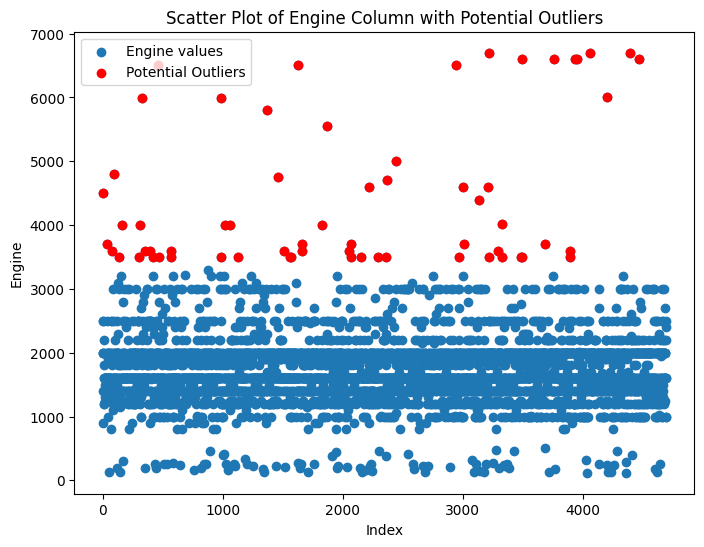

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate Z-scores for the 'engine' column
engine_values = data_after_encode['engine']
z_scores = (engine_values - engine_values.mean()) / engine_values.std()

# Define a threshold for Z-scores to identify outliers 
threshold = 3

# Find the indices of potential outliers based on the threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Create a scatter plot of 'engine' values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(engine_values)), engine_values, label='Engine values')
plt.scatter(outlier_indices, engine_values.iloc[outlier_indices], color='red', label='Potential Outliers')
plt.title('Scatter Plot of Engine Column with Potential Outliers')
plt.xlabel('Index')
plt.ylabel('Engine')
plt.legend()
plt.show()


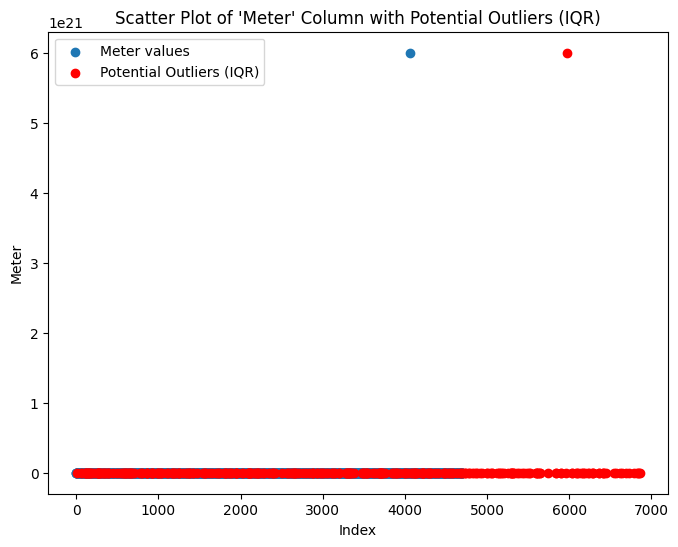

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the quartiles (Q1 and Q3) for 'meter'
Q1 = data_after_encode['meter'].quantile(0.25)
Q3 = data_after_encode['meter'].quantile(0.75)

# Calculate the IQR 
IQR = Q3 - Q1

# lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers using the IQR method
outliers_iqr_meter = data_after_encode[(data_after_encode['meter'] < lower_bound) | (data_after_encode['meter'] > upper_bound)]

# Create a scatter plot of 'meter'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_after_encode['meter'])), data_after_encode['meter'], label='Meter values')
plt.scatter(outliers_iqr_meter.index, outliers_iqr_meter['meter'], color='red', label='Potential Outliers (IQR)')
plt.title("Scatter Plot of 'Meter' Column with Potential Outliers (IQR)")
plt.xlabel('Index')
plt.ylabel('Meter')
plt.legend()
plt.show()


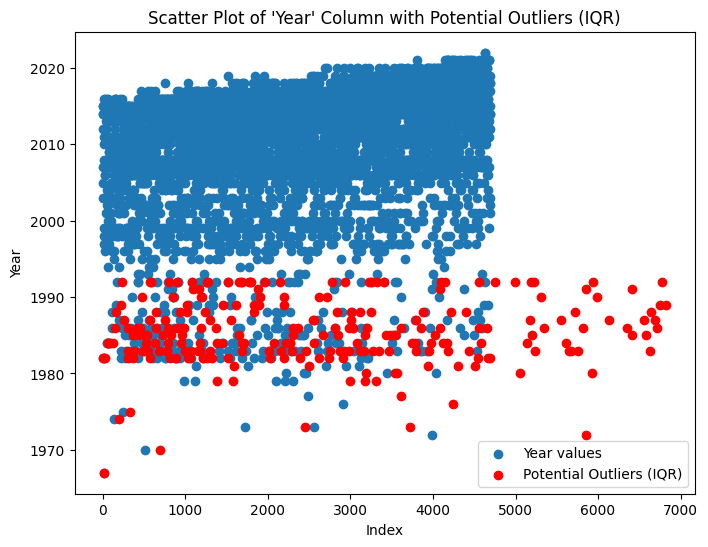

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the quartiles (Q1 and Q3) for 'year'
Q1 = data_after_encode['year'].quantile(0.25)
Q3 = data_after_encode['year'].quantile(0.75)

# Calculate the IQR 
IQR = Q3 - Q1

# lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers using the IQR method
outliers_iqr_year = data_after_encode[(data_after_encode['year'] < lower_bound) | (data_after_encode['year'] > upper_bound)]

# Create a scatter plot of 'year' values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_after_encode['year'])), data_after_encode['year'], label='Year values')
plt.scatter(outliers_iqr_year.index, outliers_iqr_year['year'], color='red', label='Potential Outliers (IQR)')
plt.title("Scatter Plot of 'Year' Column with Potential Outliers (IQR)")
plt.xlabel('Index')
plt.ylabel('Year')
plt.legend()
plt.show()


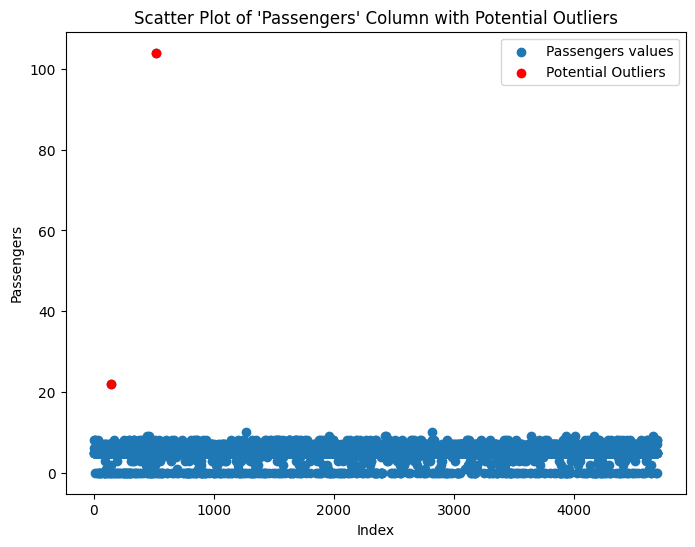

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate Z-scores for the 'passengers' column
passengers_values = data_after_encode['passengers']
z_scores_passengers = (passengers_values - passengers_values.mean()) / passengers_values.std()

# Define a threshold for Z-scores to identify outliers
threshold_passengers = 3

# Find the indices of potential outliers based on the threshold
outlier_indices_passengers = np.where(np.abs(z_scores_passengers) > threshold_passengers)[0]

# Create a scatter plot of 'passengers' values 
plt.figure(figsize=(8, 6))
plt.scatter(range(len(passengers_values)), passengers_values, label='Passengers values')
plt.scatter(outlier_indices_passengers, passengers_values.iloc[outlier_indices_passengers], color='red', label='Potential Outliers')
plt.title("Scatter Plot of 'Passengers' Column with Potential Outliers")
plt.xlabel('Index')
plt.ylabel('Passengers')
plt.legend()
plt.show()


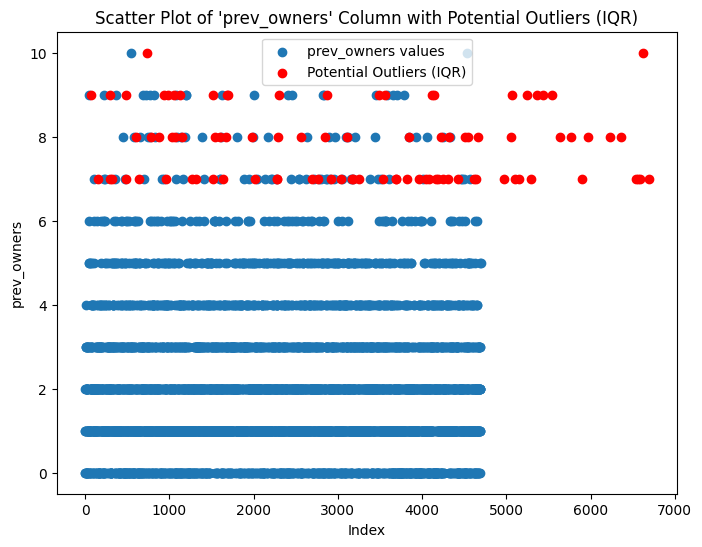

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the quartiles (Q1 and Q3) for 'prev_owners'
Q1 = data_after_encode['prev_owners'].quantile(0.25)
Q3 = data_after_encode['prev_owners'].quantile(0.75)

# Calculate the IQR 
IQR = Q3 - Q1

# lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers using the IQR method
outliers_iqr = data_after_encode[(data_after_encode['prev_owners'] < lower_bound) | (data_after_encode['prev_owners'] > upper_bound)]

# Create a scatter plot of 'prev_owners' values 
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_after_encode['prev_owners'])), data_after_encode['prev_owners'], label='prev_owners values')
plt.scatter(outliers_iqr.index, outliers_iqr['prev_owners'], color='red', label='Potential Outliers (IQR)')
plt.title("Scatter Plot of 'prev_owners' Column with Potential Outliers (IQR)")
plt.xlabel('Index')
plt.ylabel('prev_owners')
plt.legend()
plt.show()


In [34]:
# Remove outliers with quartiles
def detect_outlier_quartiles(data, columns):
    for column in columns:
        q1, q3= np.percentile(data[column],[25,75])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr) 
        data = data[((data[column])>= lower_bound ) & ((data[column]) <= upper_bound)]
   
    return data

In [35]:
# remove outliers with quartiles for ['year', 'meter', 'prev_owners'] features
removed_outliers = detect_outlier_quartiles(data_to_remove_outliers, ['year', 'meter', 'prev_owners'])

In [36]:
# Remove outliers with z-score for ('engine', 'passengers')
def detect_outlier_zscore(data, columns):
    threshold=3
    for column in columns:
        mean_1 = np.mean(data[column])
        std_1 =np.std(data[column])
        new_col = ((data[column]-mean_1)/std_1)
        data = data[new_col <= threshold]
        data = data[new_col >= (threshold*-1)]

    return data

In [37]:
# remove outliers with z-score for ['engine', 'passengers'] features
removed_outliers = detect_outlier_zscore(removed_outliers, ['engine', 'passengers'])

C:\Users\ktech\AppData\Local\Temp\ipykernel_5440\2107861126.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[new_col >= (threshold*-1)]
C:\Users\ktech\AppData\Local\Temp\ipykernel_5440\2107861126.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[new_col >= (threshold*-1)]


# After removing outliers

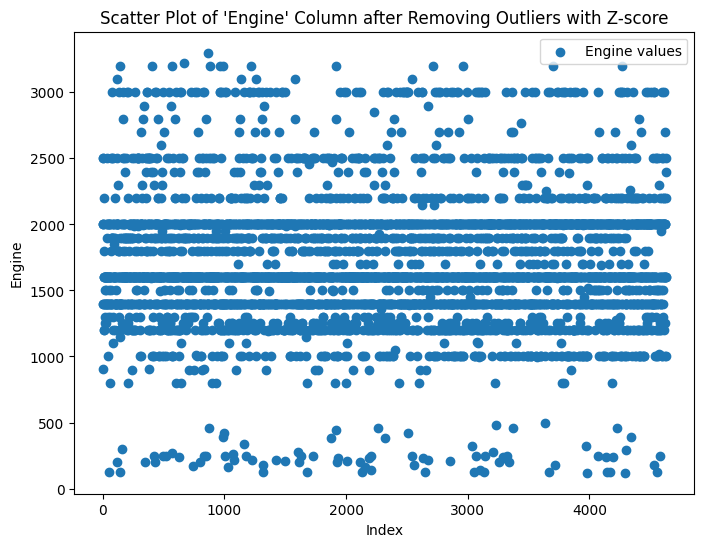

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Function to remove outliers with z-score
def detect_outlier_zscore(data, columns):
    threshold = 3
    for column in columns:
        mean_1 = np.mean(data[column])
        std_1 = np.std(data[column])
        new_col = ((data[column] - mean_1) / std_1)
        data = data[(new_col <= threshold) & (new_col >= (threshold * -1))]  # Filtering data

    return data

# Call the function to remove outliers for 'engine' column using Z-score
data_without_outliers_zscore_engine = detect_outlier_zscore(data_after_encode, ['engine'])

# Create a scatter plot for 'engine' after removing outliers with Z-score
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_without_outliers_zscore_engine['engine'])), data_without_outliers_zscore_engine['engine'], label='Engine values')
plt.title("Scatter Plot of 'Engine' Column after Removing Outliers with Z-score")
plt.xlabel('Index')
plt.ylabel('Engine')
plt.legend()
plt.show()


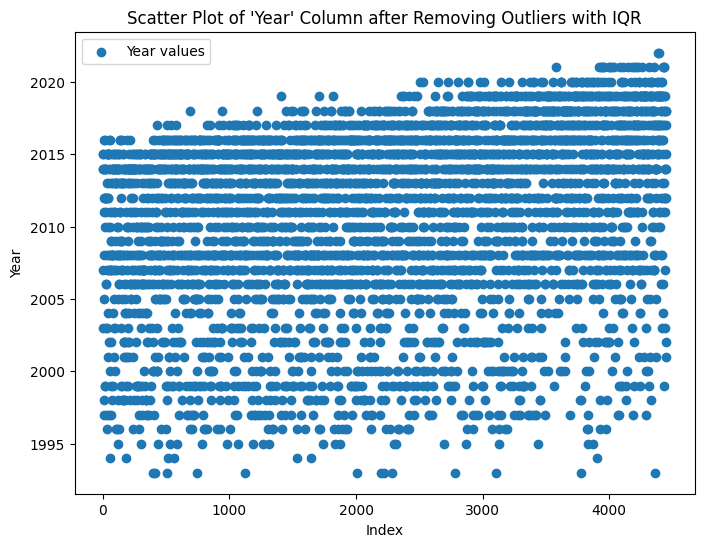

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Function to remove outliers with quartiles
def detect_outlier_quartiles(data, columns):
    for column in columns:
        q1, q3 = np.percentile(data[column], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        data = data[((data[column]) >= lower_bound) & ((data[column]) <= upper_bound)]

    return data

# Call the function to remove outliers for 'year' column using quartiles
data_without_outliers_iqr_year = detect_outlier_quartiles(data_after_encode, ['year'])

# Create a scatter plot for 'year' after removing outliers with IQR
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_without_outliers_iqr_year['year'])), data_without_outliers_iqr_year['year'], label='Year values')
plt.title("Scatter Plot of 'Year' Column after Removing Outliers with IQR")
plt.xlabel('Index')
plt.ylabel('Year')
plt.legend()
plt.show()


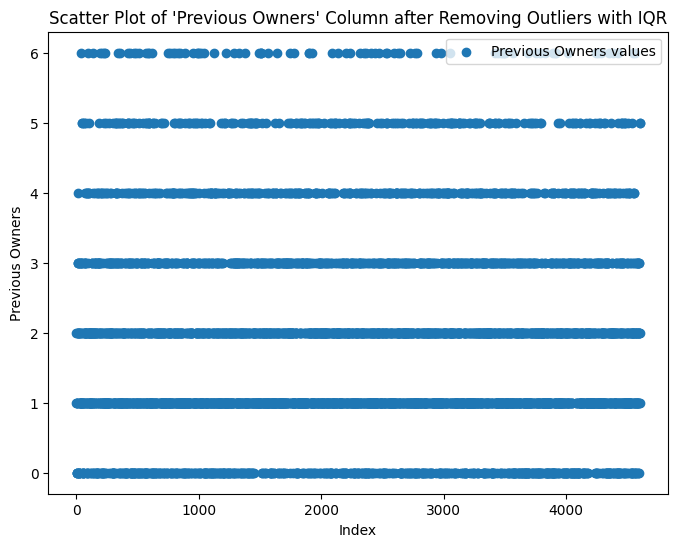

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Function to remove outliers with quartiles
def detect_outlier_quartiles(data, columns):
    for column in columns:
        q1, q3 = np.percentile(data[column], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        data = data[((data[column]) >= lower_bound) & ((data[column]) <= upper_bound)]

    return data

# Call the function to remove outliers for 'prev_owners' column using quartiles
data_without_outliers_iqr_prev_owners = detect_outlier_quartiles(data_after_encode, ['prev_owners'])

# Create a scatter plot for 'prev_owners' after removing outliers with IQR
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_without_outliers_iqr_prev_owners['prev_owners'])), data_without_outliers_iqr_prev_owners['prev_owners'], label='Previous Owners values')
plt.title("Scatter Plot of 'Previous Owners' Column after Removing Outliers with IQR")
plt.xlabel('Index')
plt.ylabel('Previous Owners')
plt.legend()
plt.show()


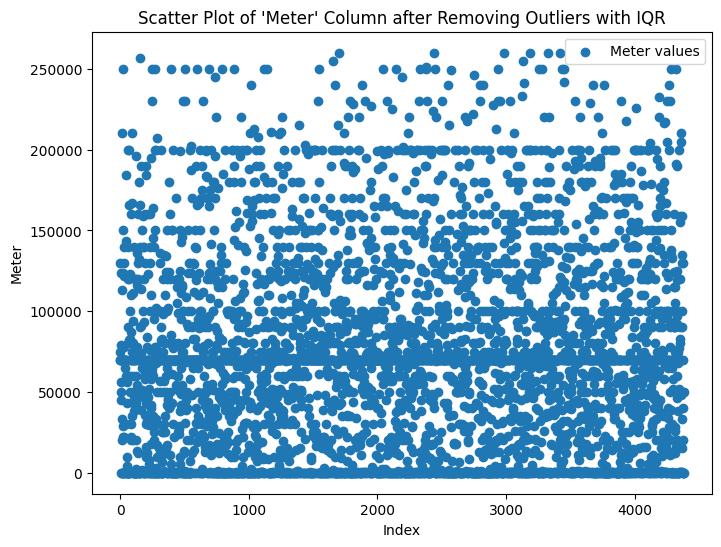

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Function to remove outliers with quartiles
def detect_outlier_quartiles(data, columns):
    for column in columns:
        q1, q3 = np.percentile(data[column], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        data = data[((data[column]) >= lower_bound) & ((data[column]) <= upper_bound)]

    return data

# Call the function to remove outliers for 'meter' column using quartiles
data_without_outliers_iqr_meter = detect_outlier_quartiles(data_after_encode, ['meter'])

# Create a scatter plot for 'meter' after removing outliers with IQR
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_without_outliers_iqr_meter['meter'])), data_without_outliers_iqr_meter['meter'], label='Meter values')
plt.title("Scatter Plot of 'Meter' Column after Removing Outliers with IQR")
plt.xlabel('Index')
plt.ylabel('Meter')
plt.legend()
plt.show()


# Normalization

In [42]:
# Normalize data 
def normalize_features(data, column_names, normalizer):
    normalizer.fit(data[column_names])
    normalized_data = normalizer.transform(data[column_names])
    # save data back to the data frame
    data[column_names] = normalized_data
    return data

In [43]:
# Normalize data with PowerTransformer
from sklearn.preprocessing import StandardScaler
normalized_data = normalize_features(removed_outliers, features, StandardScaler())

array([[<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'meter'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'passengers'}>],
       [<Axes: title={'center': 'prev_owners'}>, <Axes: >]], dtype=object)

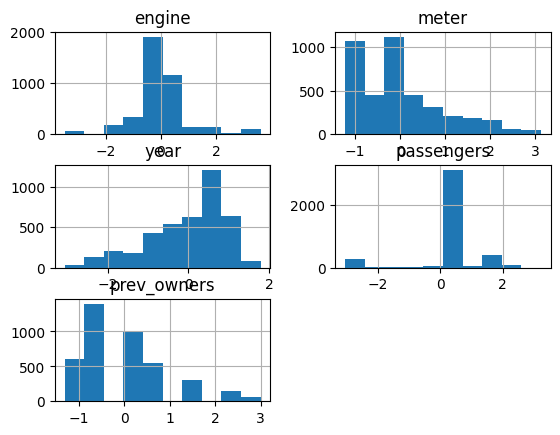

In [44]:
normalized_data[features].hist()

In [45]:
# Save data frame to handling_data csv file
import pandas as pd 
data_after_encode.to_csv('handling_data.csv', index=False)

In [46]:
# Target variables is price
# data is features  
data_to_use = normalized_data.copy()
target = data_to_use['price']
data_to_use.drop('price', inplace = True, axis = 1)
data_to_use = data_to_use.reset_index(drop=True)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'data_to_use' contains features and 'target' contains the target variable 'price'
x_train, x_test, y_train, y_test = train_test_split(data_to_use, target, test_size=0.25, random_state=41)

# Initialize and train the KNN model
knn = KNeighborsRegressor(n_neighbors=11, weights='distance')
knn.fit(x_train, y_train)

# Make predictions using KNN on test set
knn_predictions = knn.predict(x_test)

# Evaluate KNN model using RMSE
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
print("Root Mean Squared Error for KNN:", knn_rmse)

# Evaluate KNN model using MAE
knn_mae = mean_absolute_error(y_test, knn_predictions)
print("Mean Absolute Error for KNN:", knn_mae)

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(max_depth=5)  
dt.fit(x_train, y_train)

# Make predictions using Decision Tree on test set
dt_predictions = dt.predict(x_test)

# Evaluate Decision Tree model using RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
print("Root Mean Squared Error for Decision Tree:", dt_rmse)

# Evaluate Decision Tree model using MAE
dt_mae = mean_absolute_error(y_test, dt_predictions)
print("Mean Absolute Error for Decision Tree:", dt_mae)


Root Mean Squared Error for KNN: 44541.60185421622
Mean Absolute Error for KNN: 17150.76184507404
Root Mean Squared Error for Decision Tree: 48976.42100746984
Mean Absolute Error for Decision Tree: 21384.674853269207


For KNN: RMSE of approximately 44,541.60 units.
For Decision Tree: RMSE of approximately 48,976.42 units.
Lower values of RMSE indicate better accuracy, meaning the smaller the RMSE, the better the model's performance in predicting the target variable
For KNN: MAE of approximately 17,150.76 units.
For Decision Tree: MAE of approximately 21,384.67 units.
Similar to RMSE, lower MAE values indicate better accuracy in prediction
 the KNN model performs better in predicting the target variable compared to the Decision Tree model for the dataset and evaluation method used

In [48]:
data_after_encode

,year,sunroof,engine,meter,prev_owners,passengers,price,name_Dodge Massey,name_Dodge رام,name_أفيكو,...,original_use_حكومي,original_use_خصوصي,original_use_عمومي,license_فلسطينية,license_نمرة صفراء,gear_اوتوماتيك,gear_عادي,gear_نصف اوتوماتيك,glass_الكتروني,glass_يدوي
0,2014,1,2000,75000,1.0,5,100000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2007,1,2500,130000,2.0,8,60000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1982,0,906,70000.0,0.0,5,5500,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,2015,1,2000,70000.0,0.0,6,205000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,2015,0,1400,123456,1.0,5,65000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,2015,0,1000,130000,2.0,5,45000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6860,2002,0,2400,0,5.0,8,48000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6861,2018,0,1600,50000,1.0,5,87000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6862,2017,1,2200,100,2.0,7,126000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
